# 5.1. 합성곱 신경망

딥러닝 역전파는 순전파 과정에 따라 계산된 오차 정보가 신경망의 모든 노드(출력층->은닉층->입력층)로 전송된다. 이러한 복잡한 계산과정을 해결하는 것이 합성곱 신경망이다. 합성곱 신경망은 이미지 전체를 한 번에 계산하는 것이 아닌 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석할 수 있는 신경망

## 5.1.1 합성곱층의 필요성

이미지 분석은 배열을 펼쳐서 각 픽세렝 가중치를 곱하여 은닉층으로 전달하게 된다. 이미지를 펼쳐서 분석하면 데이터의 공간적 구조를 무시하게 되는데, 이것을 방지하려고 도입된 것이 합성곱층이다.

## 5.1.2. 합성곱 신경망 구조


합성곱 신경망은 음성 인식이나 이미지/영상 인식에서 사용되는 신경망이다. 다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화되어 있다.

1. 입력층
2. 합성곱층
3. 풀링층
4. 완전연결층
5. 출력층

합성곱 신경망은 합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터를 추출한다. 그 후 추출된 주요 특성 벡터들은 완전연결층을 거치면서 1차원 벡터로 변환되며, 마지막으로 출력층에서 활성화 함수인 소프트맥스 함수를 사용하여 최종 결과가 출력된다.

입력층: 이미지는 단순 1차원의 데이터가 아닌 높이, 너비, 채널의 값을 갖는 3차원 데이터이다. 이때 채널은 이미지가 그레이 스케일이면 1 값을 가지며, 컬러면 3 값을 가진다.

합성곱층: 합성곱층은 입력 데이터에서 특성을 추출하는 역할을 수행한다. 커널 필터를 토해 이미지의 모든 영역을 훑으면서 특성 맵을 추출한다.

<스트라이드가 1일 때 이동하는 과정>

1단계. 입력 이미지에 3X3 필터 적용


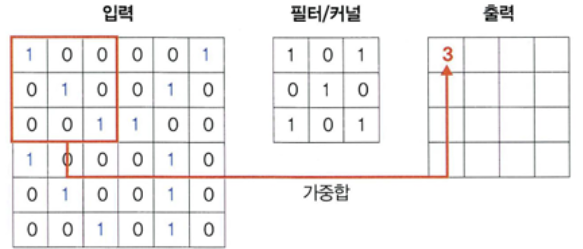

2단계. 필터가 1만큼 이동

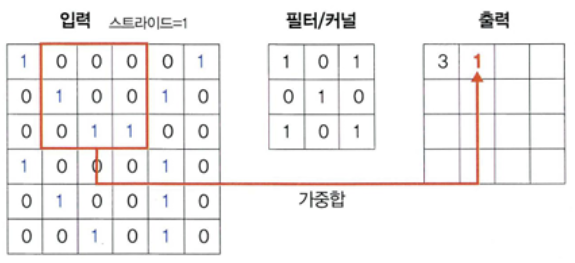

3단계. 필터가 1만큼 두 번째 이동 위의 단계를 반복한다.

이렇게 커널은 스트라이드 간격만큼 순회하면서 모든 입력 값과의 합성곱 연산으로 새로운 특성 맵을 만들게 되며, 커널과 스트라이드의 상호작용으로 원본의 크기가 줄어들어 특성 맵이 된다.

컬러 이미지의 합성곱을 알아보자. 그레이스케일 이미지와는 다르게 필터 채널이 3이며, RGB 각각에 서로 다른 가중치로 합성곱을 적용한 후 결과를 더해준다.

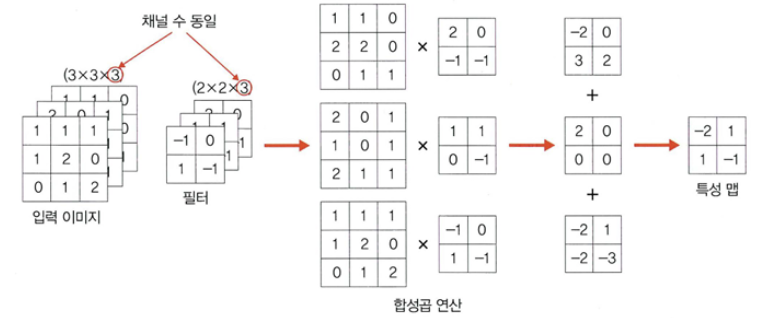

필터 채널이 아닌 필터의 개수가 두개 이상인 합성곱은, 필터 각각이 특성 추출 결과의 채널이 된다.

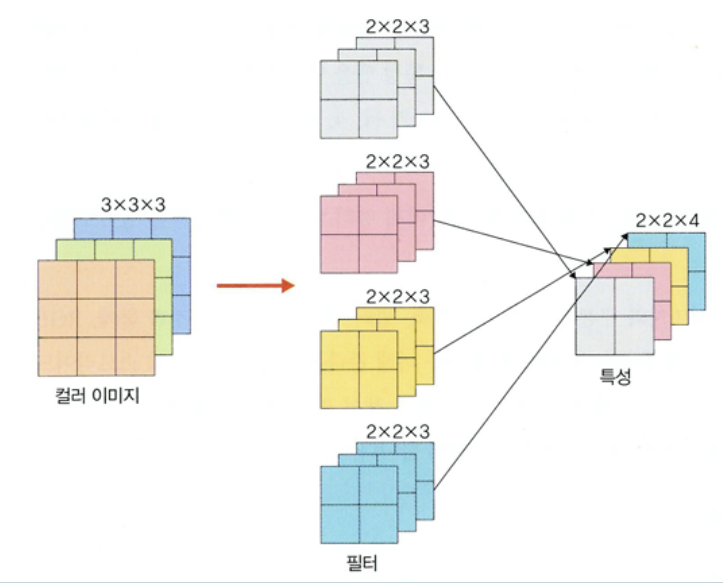

풀링층: 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 한다.

- 최대 풀링: 대상 영역에서 최댓값을 추출
- 평균 풀링: 대상 영역에서 평균을 반환(각 커널 값을 평균화시켜 중요한 가중치를 갖는 값의 특성이 희미해질 수 있음)

완전연결층: 합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전연결층으로 전달되어, 이미지가 3차원 벡터에서 1차원 벡터로 펼쳐지게 된다.

출력층: 출력층에서는 소프트맥스 활성화 함수가 사용된다. 이를 통해 이미지가 각 레이브를에 속할 확률 값이 출력되며, 이때 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정된다.

## 5.1.3 1D, 2D, 3D 합성곱

1D 합성곱: 1D 합성곱은 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱이다. 그래프 곡선을 완화할 때 많이 사용된다

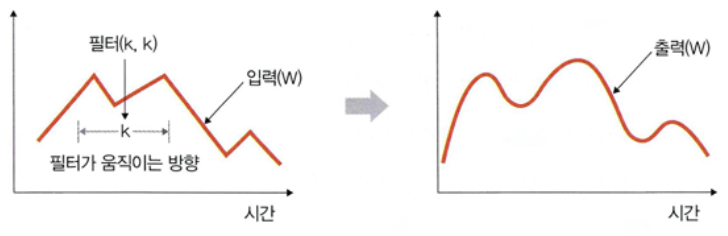

2D 합성곱: 필터가 방향 두 개로 움직이는 형태이다

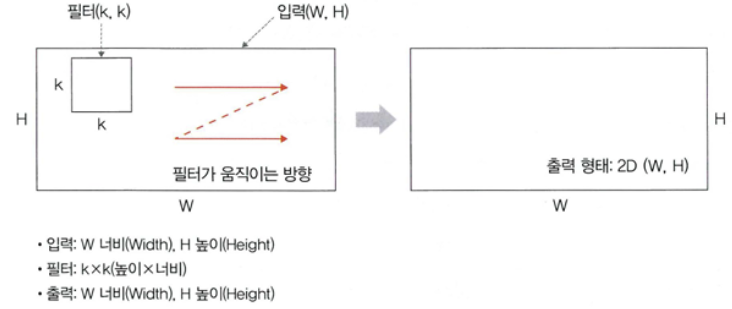

3D 합성곱: 필터가 움직이는 방향이 세 개있다. 출력은 3D 형태이다.



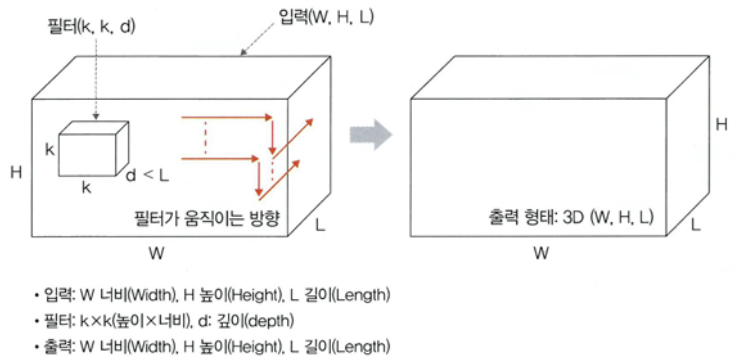

3D 입력을 갖는 2D 합성곱: 입력이 3D 형태임에도 출력 형태가 3D가 아닌 2D 행렬을 취하는 것이다.

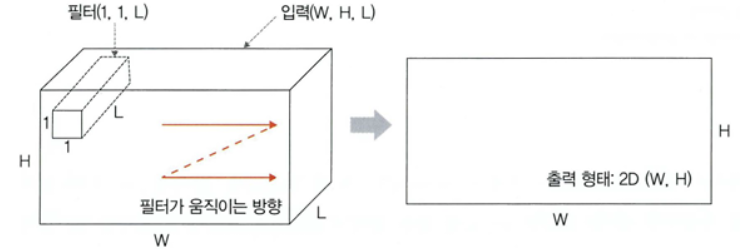

1X1 합성곱: 3D 형태로 입력된다. 채널 수를 조정해서 연산량이 감소되는 효과가 있다.

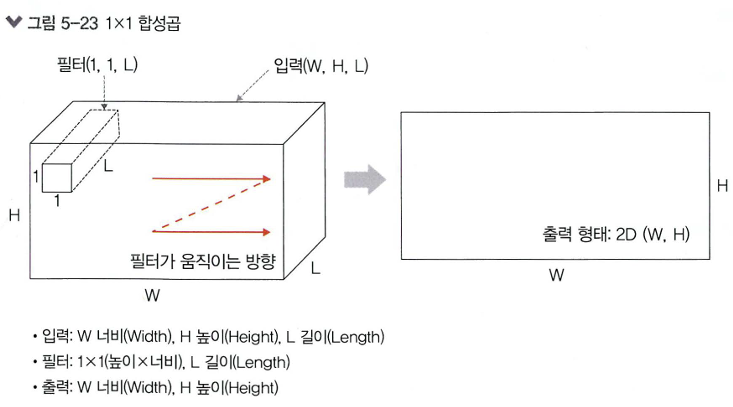